In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [26]:
df = pd.read_csv('./data/review_dataset_v5_sum_e.csv', index_col=0) #.dropna().reset_index()
df

,id,search_word,title,url,blog_name,date,content,content_len,content_hash_cnt,article_hash_cnt,...,e_sum_758,e_sum_759,e_sum_760,e_sum_761,e_sum_762,e_sum_763,e_sum_764,e_sum_765,e_sum_766,e_sum_767
0,shuenmama.223027650182,홍대 회식 맛집,홍대 고기집 데이트 쟁반한상 삼겹살 맛집 회식 쟁반집8292,https://blog.naver.com/shuenmama/223027650182,shuen,20230225,홍대에서 데이트 하기로 한 주말\n진짜 간만에 홍대\n전에 항상 세우던 공영주차장이...,3094,10,12,...,-0.071052,-0.279409,-0.019280,0.088353,0.074116,0.151068,-0.218568,0.135121,-0.202314,0.075646
1,rosepink1974.223153722255,홍대 회식 맛집,홍대삼겹살 청년화로 1987 이베리코 연남동고기집 회식맛집,https://blog.naver.com/rosepink1974/223153722255,예쁜 달코미의 단맛 인생,20230712,청년화로1987\n서울 마포구 동교로 219 1층\n청년화로 1987\n홍대입구역 ...,2345,9,9,...,-0.004300,0.109211,-0.229826,-0.011483,-0.135787,0.081954,-0.190038,0.056040,-0.015741,0.089915
2,mou25.223209216526,홍대 회식 맛집,"합정 맛집 홍대 회식장소로 딱, 느낌 있는 소고기 고깃집...",https://blog.naver.com/mou25/223209216526,생애 기록장,20230912,"매번 느끼는 거지만,\n회식장소 하나는\n기가 막히게 섭외하는 울 주임님.\n\n얼...",2904,12,12,...,0.098140,0.018172,-0.038048,-0.163332,0.125974,0.080513,-0.150159,0.153333,-0.009455,0.376639
3,lulu_l.223118434610,홍대 회식 맛집,"홍대 맛집 합정 갈비가 부드러운 소고기집 연막탄 회식, 데이트...",https://blog.naver.com/lulu_l/223118434610,안나의 일상공유,20230602,홍대 소고기 맛집\n연막탄\n\n남자친구가 맛있는 고깃집을 알고\n있다길해 합정 맛...,2810,0,7,...,-0.194267,-0.102103,-0.003023,0.045334,0.189272,0.044959,0.037010,0.184106,-0.119976,0.236935
4,ruston_.223161590597,홍대 회식 맛집,"홍대회식, 육즙 폭발하는 소고기 맛집 '일편등심 홍대본점'",https://blog.naver.com/ruston_/223161590597,로빈이 토끼란 사실을 알고있었나?,20230720,안녕하세요. LoLCake입니다.\n\n\n최근 이직을 준비하는 동료의 축하 파티를...,2299,2,2,...,0.054366,0.103469,0.066450,-0.154877,-0.137764,-0.005832,-0.225489,0.290053,0.004481,-0.180484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10484,suitbull.222112955908,영등포 데이트 맛집,"영등포 돈까스 맛집, 타임스퀘어 데이트 ::간코::",https://blog.naver.com/suitbull/222112955908,SUITBULL(숯불)의 미식 그리고 풍류,20201011,안녕하세요.\n\n미식을 즐기는\n악식가(樂食家)\nSUITBULL (숯불) 입니다...,1642,0,11,...,0.071756,0.052760,-0.179550,0.002847,0.028570,-0.046909,-0.151431,-0.090047,-0.249180,0.562838
10485,dusal0652.222413131913,영등포 데이트 맛집,[영등포 문래동] 문래창작촌에서도 유명한 양키통닭,https://blog.naver.com/dusal0652/222413131913,기록하는 습관,20210628,날씨가 좋은 어느 날\n문래에서 일어난 일ㅎㅎㅎㅎㅎ\n\n친구랑 같이 가기로 한 '...,1996,12,12,...,-0.081985,0.372315,0.081598,0.058389,-0.235784,-0.242827,-0.167849,0.290175,-0.300595,0.004085
10486,shinesparis.221509975993,영등포 데이트 맛집,영등포역 맛집 '럭치미' 인도요리 커리 완전맛있어~!,https://blog.naver.com/shinesparis/221509975993,귀여운 서소남매,20190410,인도요리를 좋아하는편이라 신랑이랑 가끔 먹으러가곤한다.\n영등포역에 위치한 인도요리...,2350,0,11,...,-0.006718,0.102097,-0.253869,-0.052721,0.090817,0.026666,0.168704,-0.109230,-0.486465,-0.021065
10487,sleeping_yulmu.223070079287,영등포 데이트 맛집,[서울/여의도] 블링 블링 빛이 나는 맛 좋은 삼겹살! '돈블랑...,https://blog.naver.com/sleeping_yulmu/22307007...,sleeping_day,20230410,예년보다 벚꽃이 일찍 개화한 올해!\n친구들과 꽃놀이는 빼놓을 수가 없죠.\n함께 ...,1745,40,30,...,0.080572,-0.138479,-0.154379,-0.007955,0.176309,0.342857,-0.217432,0.095505,0.106370,0.060402


In [47]:
df[df.date < 20171231]

,index,id,search_word,title,url,blog_name,date,content,content_len,content_hash_cnt,...,e_sum_758,e_sum_759,e_sum_760,e_sum_761,e_sum_762,e_sum_763,e_sum_764,e_sum_765,e_sum_766,e_sum_767
122,122,faminlove.220974803764,홍대 회식 맛집,"홍대 맛집 추천, 화로당에서 회식한 날",https://blog.naver.com/faminlove/220974803764,부하들과 함께 행복더하기,20170407,"홍대 맛집 추천, 화로당에서 회식한 날\n\n얼마전 회사에서 세미나를 하고~\n\n...",1928,0,...,-0.088807,-0.060819,-0.297302,-0.138403,0.111530,0.237932,-0.195231,-0.093688,-0.214965,0.211081
159,159,loveis8199.100172134266,홍대 회식 맛집,"&lt;홍대회식장소추천&gt;닭갈비 맛집, 대복식당",https://blog.naver.com/loveis8199/100172134266,언니소의 건강한 푸드스토리,20121121,﻿요즘 이런저런 모임이 엄청 많으시죠~~~~\n\n연말이 다가오면서 왠지 쓸쓸해지기...,2033,0,...,0.027574,-0.031445,-0.276451,0.017602,0.104519,0.172078,-0.286321,0.154378,-0.244131,0.495345
162,162,bjegob.10182978971,홍대 회식 맛집,[홍대맛집추천]홍대회식장소로 딱인 왕의식탁,https://blog.naver.com/bjegob/10182978971,만드는게 제일좋아 ! 비제곱&미퐁당,20140105,[홍대맛집추천]홍대회식장소로 딱인 왕의식탁\n\n홍대회식장소로 딱인 왕의식탁에 다녀...,1614,0,...,0.118309,-0.216281,0.044632,-0.245654,0.041459,0.261674,-0.223764,-0.002753,-0.084960,0.089714
183,183,realskin.221145466067,홍대 회식 맛집,"저렴한 홍대 고기집, 소고기 맛집 '하회마을' 연말 홍대 회식...",https://blog.naver.com/realskin/221145466067,썬샤인의 내몸이 좋아하는 요리,20171122,"저렴한 홍대 고기집, 소고기 맛집 '하회마을' 연말 홍대 회식장소로 굿!\n\n...",2376,0,...,0.054130,-0.017003,0.130059,-0.328443,0.022651,0.299878,-0.359980,-0.020708,-0.103790,0.068638
228,228,herbteacher1.220566371402,홍대 회식 맛집,[홍대맛집] 회식장소로 좋은 홍대맛집 돈코보쌈,https://blog.naver.com/herbteacher1/220566371402,"건강을 키워주는 선생님, 닥터스팜",20151212,[홍대맛집] 회식장소로 좋은 홍대맛집 돈코보쌈\n\n안녕하세요 건강을 키워주는 선생...,858,0,...,-0.352332,-0.310588,-0.142495,-0.203142,-0.044532,0.195810,-0.170445,0.100307,-0.164065,0.362994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10340,10355,jungeun4661.220267011091,영등포 데이트 맛집,"[영등포 어부와백정] 영등포맛집, 영등포역 맛집, 영등포 고기집...",https://blog.naver.com/jungeun4661/220267011091,달달한 깅 블로그 ♬,20150208,"[영등포 어부와백정] 영등포맛집, 영등포역 맛집, 영등포 고기집, 줄서서먹는 영등포...",2751,0,...,0.002721,-0.472858,-0.047667,-0.133314,-0.189858,0.164437,0.048107,-0.096063,-0.184030,0.049340
10350,10365,flying1225.220168491460,영등포 데이트 맛집,"발산역 데이트 맛집 특집★ 아웃백 발산점,아웃백 립추천...",https://blog.naver.com/flying1225/220168491460,SICHU♥시네정주혀나 안심심한 일상,20141101,안녕하세요~! 잇님들 시츄입니다\n\n오늘은 저희 동네인 발산역 특집 입니다~! 하...,3007,0,...,-0.219050,0.021717,-0.081496,-0.126799,-0.039605,0.137812,-0.035439,0.341604,-0.219286,0.112419
10380,10395,yujinbae_1009.220185170345,영등포 데이트 맛집,"[영등포맛집/멕시코] 또띠아와 나초가 무한리필, 온 더 보더",https://blog.naver.com/yujinbae_1009/220185170345,배네비의 네버랜드,20141118,외국음식 좋아하는 배네비\n\n풉\n\n외국음식\n\n외국음식 좋아라하는 배네비가 ...,1311,5,...,-0.035208,-0.076142,-0.034683,-0.376105,-0.182351,-0.085120,0.285608,0.007166,-0.581147,-0.077927
10419,10434,dalsong92.220776670785,영등포 데이트 맛집,주말데이트1.영등포타임스퀘어/오쭈/타코벨,https://blog.naver.com/dalsong92/220776670785,보통의 날들(記錄),20160801,안녕하세요\n\n너무 더웟던 주말ㅠㅠ\n\n장마는 끝이라구 하고 이젠 정말 더울 일...,1081,0,...,-0.008010,0.224746,-0.394059,0.023720,0.056448,-0.153230,-0.019881,0.028354,-0.277975,-0.023861


In [27]:
categorical_col = ['adpost_yn', 'map_yn', 'video_yn', 'phone_yn']
numerical_col = ['content_len', 'content_hash_cnt', 'article_hash_cnt', 'like_cnt', 'emoticon_cnt', 
                 'total_post', 'link_cnt', 'image_cnt', 'repeat_word_cnt', 'noun_verb_ratio']
label_col = 'label_f2'
embedding_col = [f'e_sum_{i}' for i in range(768)]

In [28]:
df = df[df.noun_verb_ratio < np.inf].reset_index()

In [29]:
uid = df['id'].tolist()
X = df[categorical_col + numerical_col].values
y = df[label_col].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=22)

### NaiveBayes

In [31]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6835322195704058

### RFC

In [72]:
model = RandomForestClassifier(max_depth=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7326968973747017

In [73]:
model.score(X_train, y_train)

0.7405418307673947

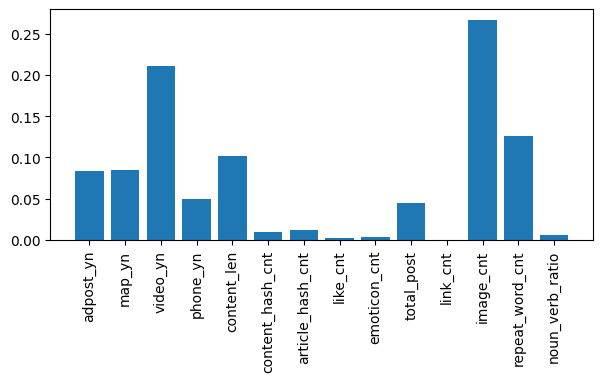

In [74]:
plt.figure(figsize=(7, 3))
plt.bar(categorical_col+numerical_col, model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [68]:
preds = model.predict(X_test)

In [36]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.77      0.66      0.71       994
         1.0       0.73      0.82      0.77      1101

    accuracy                           0.74      2095
   macro avg       0.75      0.74      0.74      2095
weighted avg       0.75      0.74      0.74      2095



### XGB

In [10]:
model = XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7298329355608592

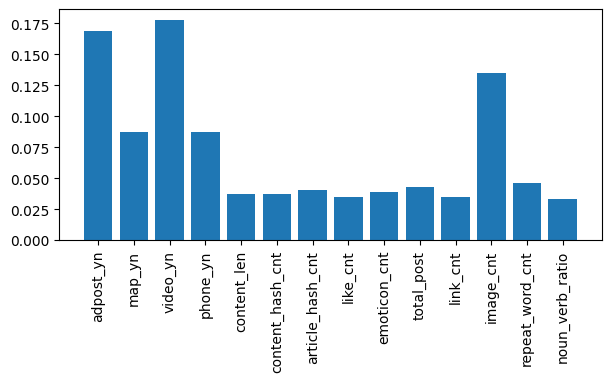

In [11]:
plt.figure(figsize=(7, 3))
plt.bar(categorical_col+numerical_col, model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

### LGBM

In [21]:
model = LGBMClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7408114558472554

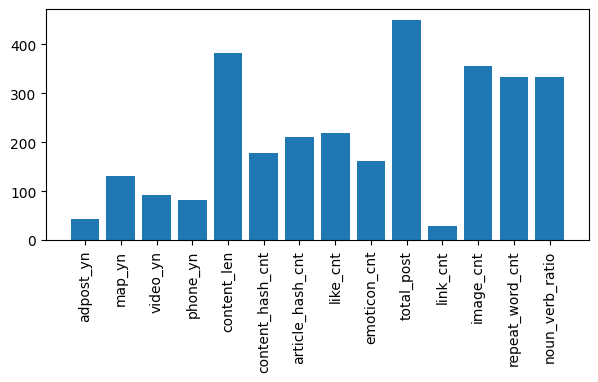

In [22]:
plt.figure(figsize=(7, 3))
plt.bar(categorical_col+numerical_col, model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

### LogisticRegression

In [12]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7064439140811456

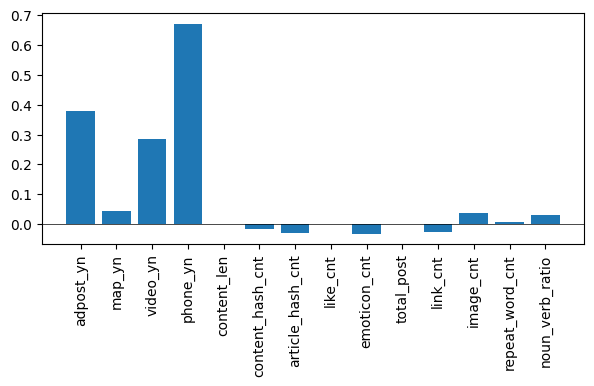

In [13]:
plt.figure(figsize=(7, 3))
plt.bar(categorical_col+numerical_col, model.coef_[0])
plt.xticks(rotation=90)
plt.axhline(y=0, c='black', lw=0.5)
plt.show()

### SVC

In [16]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6529832935560859

In [24]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6205250596658711